In [0]:
# try out a few models, all trained here.
from tensorflow.keras.layers import Input, Dense, Conv2D as c2d, MaxPooling2D as m2d, Flatten, Softmax
from tensorflow.keras.models import Model

In [0]:
from tensorflow.keras.layers import AveragePooling2D as a2d

In [0]:
import numpy as np
import pandas as pd
import cv2 as cv2
import imutils

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import glob
iptr = glob.glob('/content/drive/My Drive/FC_Dataset/*/*.jpg')
images = []
for p in iptr:
  num = cv2.imread(p,1)
  images.append(num)
images = np.array(images)

KeyboardInterrupt: ignored

In [0]:
from google.colab.patches import cv2_imshow
crop = []
for im in images:
  crop.append(im[500:2500,500:2500,:])
crop = np.array(crop)
images = None

In [0]:
from sklearn.preprocessing import OneHotEncoder as op
cl = []
opt = op(dtype = np.int16)
# to do this op thing.
for t in iptr:
  cl.append([t.split('/')[5]])
data_d = opt.fit(cl)

In [0]:
data_yp = data_d.transform(cl).toarray()
data_y = np.repeat(data_yp,36,axis = 0)
print(data_y.shape)

(5328, 5)


In [0]:
cl = None
data_yp = None
data_d = None

In [0]:
data_x = []
count = 0
for c in crop:
  for i in range(0,36):
    z = imutils.rotate_bound(c,10*i)
    z = cv2.resize(z,(64,64),interpolation = cv2.INTER_AREA).astype(int)
    data_x.append(z)
    count = count + 1
data_x = np.array(data_x)

In [0]:
seed = np.random.randint(0, 10000)
np.random.seed(seed)
np.random.shuffle(data_x)
data_train_x, data_valid_x, data_test_x = data_x[0:4500,:,:,:], data_x[4500:5000,:,:,:], data_x[5000:,:,:,:]
data_x = None
np.random.seed(seed)
np.random.shuffle(data_y)
data_train_y, data_valid_y, data_test_y = data_y[0:4500,:], data_y[4500:5000,:], data_y[5000:,:]
data_y = None

In [0]:
# to save the train and testing data in the folder.
import pickle
mydata = { 'a' : data_train_x,
           'b' : data_valid_x,
           'c' : data_test_x}
output = open('/content/drive/My Drive/Data_Almond/data_train_pickle.pkl','wb')
pickle.dump(mydata, output)
output.close()

In [0]:
mydata = { 'a' : data_train_y,
           'b' : data_valid_y,
           'c' : data_test_y}
output = open('/content/drive/My Drive/Data_Almond/data_label_pickle.pkl','wb')
pickle.dump(mydata, output)
output.close()

In [0]:
# get back the data.
import pickle
pkl_file = open('/content/drive/My Drive/Data_Almond/data_train_pickle.pkl', 'rb')
data1 = pickle.load(pkl_file)
data_train_x, data_valid_x, data_test_x = data1['a'], data1['b'], data1['c']
pkl_file = open('/content/drive/My Drive/Data_Almond/data_label_pickle.pkl', 'rb')
data1 = pickle.load(pkl_file)
data_train_y, data_valid_y, data_test_y = data1['a'], data1['b'], data1['c']
pkl_file = open('/content/drive/My Drive/Data_Almond/g_vecs.pkl', 'rb')
data1 = pickle.load(pkl_file)
g_train, g_valid, g_test = data1['a'], data1['b'], data1['c']

In [0]:
x1 = [2, 3, 4, 5, 6, 1]
x2 = [2, 3, 4, 5, 6, 1]

In [0]:
seed = np.random.randint(0,10000)
np.random.seed(seed)
np.random.shuffle(x1)
a1, b1, c1 = x1[0:2], x1[2:4], x1[4:6]
x1 = None
np.random.seed(seed)
np.random.shuffle(x2)
a2, b2, c2 = x2[0:2], x2[2:4], x2[4:6]
print(a1)
print(a2)
print(b1)
print(b2)
print(c1)
print(c2)

[6, 1]
[6, 1]
[3, 4]
[3, 4]
[5, 2]
[5, 2]


In [0]:
data_a = Input(shape = (64,64,3,)) # three dimensional numpy array.
c1 = c2d(16, (3, 3), kernel_initializer='he_uniform', padding='same',activation = 'tanh')(data_a)
m1 = m2d((2, 2))(c1)
c2 = c2d(24, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(m1)
m2 = m2d((2, 2))(c2)
c3 = c2d(32, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same')(m2)
m3 = m2d((4, 4))(c3)
f = Flatten()(m3)
d1 = Dense(8, activation='relu', kernel_initializer='he_uniform')(f)
d2 = Dense(5, activation='sigmoid')(d1)

In [0]:
s1 = Softmax(axis = -1)(d2)
model_1 = Model(inputs = data_a,outputs = [s1])

In [0]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 24)        3480      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        3104      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0     

In [0]:
model_1.compile(loss = "categorical_crossentropy",optimizer = "adam")

In [0]:
cpf1 = '/content/drive/My Drive/model_1/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
model_checkpoint_callback1 = tf.keras.callbacks.ModelCheckpoint(
    filepath=cpf1,
    save_weights_only=False,
    monitor='val_loss',
    mode='auto',
    save_best_only=False,
    verbose = 1,
    save_freq = 'epoch')
mc1 = tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/Data_Almond/best_model_1.h5', monitor='val_loss', mode='min', verbose=1)

NameError: ignored

In [0]:
model_1.fit(data_train_x, data_train_y, epochs = 500, batch_size = 16, verbose = 0,validation_data = (data_valid_x, data_valid_y), callbacks = [model_checkpoint_callback1, mc1])


Epoch 00001: saving model to /content/drive/My Drive/model_1/weights.01-1.59.hdf5

Epoch 00001: saving model to /content/drive/My Drive/Data_Almond/best_model_1.h5

Epoch 00002: saving model to /content/drive/My Drive/model_1/weights.02-1.53.hdf5

Epoch 00002: saving model to /content/drive/My Drive/Data_Almond/best_model_1.h5

Epoch 00003: saving model to /content/drive/My Drive/model_1/weights.03-1.45.hdf5

Epoch 00003: saving model to /content/drive/My Drive/Data_Almond/best_model_1.h5

Epoch 00004: saving model to /content/drive/My Drive/model_1/weights.04-1.33.hdf5

Epoch 00004: saving model to /content/drive/My Drive/Data_Almond/best_model_1.h5

Epoch 00005: saving model to /content/drive/My Drive/model_1/weights.05-1.25.hdf5

Epoch 00005: saving model to /content/drive/My Drive/Data_Almond/best_model_1.h5

Epoch 00006: saving model to /content/drive/My Drive/model_1/weights.06-1.20.hdf5

Epoch 00006: saving model to /content/drive/My Drive/Data_Almond/best_model_1.h5

Epoch 000

In [0]:
# to convert the training into grayscale.
from skimage import color
## cv2.resize(z,(64,64),interpolation = cv2.INTER_AREA).astype(int)
# [0.2989, 0.5870, 0.1140]
g_train = []
for img in data_train_x:
  m = np.dot(img,[0.2989, 0.5870, 0.1140])
  m = m.reshape(64,64,1)
  m = cv2.resize(m,(64,64),interpolation = cv2.INTER_AREA).astype(int)
  g_train.append(m)
g_valid = []
for img in data_valid_x:
  m = np.dot(img,[0.2989, 0.5870, 0.1140])
  m = m.reshape(64,64,1)
g_train = np.array(g_train)
  m = cv2.resize(m,(64,64),interpolation = cv2.INTER_AREA).astype(int)
  g_valid.append(m)
g_valid = np.array(g_valid)
g_test = []
for img in data_test_x:
  m = np.dot(img,[0.2989, 0.5870, 0.1140])
  m = m.reshape(64,64,1)
  m = cv2.resize(m,(64,64),interpolation = cv2.INTER_AREA).astype(int)
  g_test.append(m)
g_test = np.array(g_test)
mydata = { 'a' : g_train,
           'b' : g_valid,
           'c' : g_test}
output = open('/content/drive/My Drive/Data_Almond/g_vecs.pkl','wb')
pickle.dump(mydata, output)
output.close()

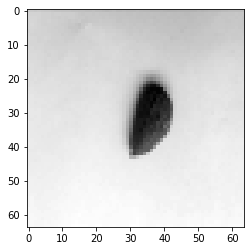

In [0]:
from matplotlib import pyplot as plt
plt.imshow(g_valid[54],cmap = 'gray')

In [0]:
g_valid = g_valid.reshape(500,64,64,1)
g_test = g_test.reshape(328,64,64,1)
g_train = g_train.reshape(4500,64,64,1)

In [0]:
# model_2 like LeNet, resized grayscale input given to the model.
data_p = Input(shape = (64,64,1,)) # three dimensional numpy array.
t1 = c2d(4, (5, 5), kernel_initializer='he_uniform', padding='valid', activation = 'tanh')(data_p)
p1 = a2d((2, 2))(t1)
t2 = c2d(8, (5, 5), activation='tanh', kernel_initializer='he_uniform', padding='valid')(p1)
p2 = a2d((2, 2))(t2)
t3 = c2d(16,(5, 5), activation='tanh', kernel_initializer='he_uniform', padding='valid')(p2)
f2 = Flatten()(t3)
lp1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(f2)
lp2 = Dense(5, activation='sigmoid')(lp1)

In [0]:
s22 = Softmax(axis = -1)(lp2)
model_2 = Model(inputs = data_p,outputs = [s22])
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 4)         104       
_________________________________________________________________
average_pooling2d (AveragePo (None, 30, 30, 4)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 8)         808       
_________________________________________________________________
average_pooling2d_1 (Average (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 16)          3216      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1296)              0   

In [0]:
4500/16

281.25

In [0]:
cpf2 = '/content/drive/My Drive/val_log/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
model_checkpoint_callback2 = tf.keras.callbacks.ModelCheckpoint(
    filepath=cpf2,
    save_weights_only=False,
    monitor='val_loss',
    mode='auto',
    save_best_only=False,
    verbose = 1,
    save_freq = 'epoch')
mc2 = tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/Data_Almond/best_model_2.h5', monitor='val_loss', mode='min', verbose=1)

NameError: ignored

In [0]:
model_2.compile(loss = 'categorical_crossentropy',optimizer = 'adam')
model_2.fit(g_train,data_train_y,epochs = 500, batch_size = 16,validation_data = (g_valid, data_valid_y), verbose = 0,callbacks = [model_checkpoint_callback2, mc2])


Epoch 00001: saving model to /content/drive/My Drive/val_log/weights.01-1.46.hdf5

Epoch 00001: saving model to /content/drive/My Drive/Data_Almond/best_model_2.h5

Epoch 00002: saving model to /content/drive/My Drive/val_log/weights.02-1.51.hdf5

Epoch 00002: saving model to /content/drive/My Drive/Data_Almond/best_model_2.h5

Epoch 00003: saving model to /content/drive/My Drive/val_log/weights.03-1.30.hdf5

Epoch 00003: saving model to /content/drive/My Drive/Data_Almond/best_model_2.h5

Epoch 00004: saving model to /content/drive/My Drive/val_log/weights.04-1.28.hdf5

Epoch 00004: saving model to /content/drive/My Drive/Data_Almond/best_model_2.h5

Epoch 00005: saving model to /content/drive/My Drive/val_log/weights.05-1.27.hdf5

Epoch 00005: saving model to /content/drive/My Drive/Data_Almond/best_model_2.h5

Epoch 00006: saving model to /content/drive/My Drive/val_log/weights.06-1.22.hdf5

Epoch 00006: saving model to /content/drive/My Drive/Data_Almond/best_model_2.h5

Epoch 000



```
# This is formatted as code
hc = tf.convert_to_tensor(hc)
hdc = tf.convert_to_tensor(hdc)
h = tf.concat([hc, hdc], 1)
```



In [0]:
# inception networks.
import tensorflow as tf
from keras.initializers import TruncatedNormal as tn
data_c = Input(shape = (64,64,3,))
vc1 = c2d(10, (1, 1), kernel_initializer='he_uniform', padding='same', activation = 'tanh')(data_c)
v1 = c2d(10, (5, 5), kernel_initializer='he_uniform', padding='same', activation = 'tanh')(vc1)
vc2 = c2d(15, (1, 1), activation='relu', kernel_initializer='he_uniform', padding='same')(data_c)
v2 = c2d(15, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(vc2)
v3 = c2d(25, (1, 1), activation='relu', kernel_initializer='he_uniform', padding='same')(data_c)
mv = m2d((3,3),strides = (1,1),padding = 'same')(data_c)
vt1 = tf.convert_to_tensor(v1)
vt2 = tf.convert_to_tensor(v2)
vt3 = tf.convert_to_tensor(v3)
vm = tf.convert_to_tensor(mv)
ct = tf.concat([vt1, vt2, vt3, mv], axis = -1)
fr = c2d(5,(5,5),activation = 'relu',kernel_initializer = tn(mean=0.0, stddev=0.05, seed=None), padding = 'valid')(ct)
fr2 = a2d((2,2), padding = 'valid')(fr)
fr3 = c2d(5,(3,3),activation = 'relu',kernel_initializer = tn(mean=0.0, stddev=0.05, seed=None), padding = 'valid')(fr2)
fr4 = a2d((2,2), padding = 'valid')(fr3)
fr5 = c2d(10,(1,1),activation = 'relu',kernel_initializer = tn(mean=0.0, stddev=0.05, seed=None), padding = 'valid')(fr4)
fr6 = a2d((4,4), padding = 'valid')(fr5)
lat = Flatten()(fr6)
mt1 = Dense(21, activation='relu', kernel_initializer='he_uniform')(lat)
mt2 = Dense(5, activation='sigmoid')(mt1)
mt3 = Softmax(axis = -1)(mt2)
model_3 = Model(inputs = data_c,outputs = [mt3])
model_3.summary()

Using TensorFlow backend.


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 64, 64, 10)   40          input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 64, 64, 15)   60          input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 64, 64, 10)   2510        conv2d_6[0][0]                   
____________________________________________________________________________________________

In [0]:
(4500/16)*50

14062.5

In [0]:
cpf = '/content/drive/My Drive/model_3/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=cpf,
    save_weights_only=False,
    monitor='val_loss',
    mode='auto',
    save_best_only=False,
    verbose = 1)
mc = tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/Data_Almond/best_model_3.h5', monitor='val_loss', mode='min', verbose=1)

In [0]:
import h5py

In [0]:
model_3.compile(loss = "categorical_crossentropy",optimizer = "adam")
model_3.fit(data_train_x, data_train_y, epochs = 175, batch_size = 16,validation_data = (data_valid_x, data_valid_y), verbose = 0,callbacks = [model_checkpoint_callback,mc])


Epoch 00001: saving model to /content/drive/My Drive/model_3/weights.01-1.60.hdf5

Epoch 00001: saving model to /content/drive/My Drive/Data_Almond/best_model_3.h5

Epoch 00002: saving model to /content/drive/My Drive/model_3/weights.02-1.60.hdf5

Epoch 00002: saving model to /content/drive/My Drive/Data_Almond/best_model_3.h5

Epoch 00003: saving model to /content/drive/My Drive/model_3/weights.03-1.61.hdf5

Epoch 00003: saving model to /content/drive/My Drive/Data_Almond/best_model_3.h5

Epoch 00004: saving model to /content/drive/My Drive/model_3/weights.04-1.60.hdf5

Epoch 00004: saving model to /content/drive/My Drive/Data_Almond/best_model_3.h5

Epoch 00005: saving model to /content/drive/My Drive/model_3/weights.05-1.67.hdf5

Epoch 00005: saving model to /content/drive/My Drive/Data_Almond/best_model_3.h5

Epoch 00006: saving model to /content/drive/My Drive/model_3/weights.06-1.67.hdf5

Epoch 00006: saving model to /content/drive/My Drive/Data_Almond/best_model_3.h5

Epoch 000

In [0]:
from keras import backend as K

In [0]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

In [0]:
def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)
  
def contrastive_loss(y_true, y_pred):
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

In [0]:
data_train_y

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0]], dtype=int16)

In [0]:
# loading the data needed for the model_4 and also preparing it for a siamese network.
tx, vx, ex = np.repeat(data_train_x,5,axis = 0), np.repeat(data_valid_x,5, axis = 0), np.repeat(data_test_x,5, axis = 0)
ty, vy, ey = np.repeat(data_train_y,5,axis = 0), np.repeat(data_valid_y,5, axis = 0), np.repeat(data_test_y,5, axis = 0)

In [0]:
seed = np.random.randint(1,10000)
tx2 = np.copy(tx)
ty2 = np.copy(ty)
np.random.seed(seed)
np.random.shuffle(tx2)
np.random.seed(seed)
np.random.shuffle(ty2)

In [0]:
vx.shape

(2500, 64, 64, 3)

In [0]:
sia_tr_x = None
sia_tr_y = None

In [0]:
vx2 = np.copy(vx)
vy2 = np.copy(vy)
np.random.seed(seed)
np.random.shuffle(vx2)
np.random.seed(seed)
np.random.shuffle(vy2)

In [0]:
mydata = { 'a' : tx,
           'b' : tx2,
           'c' : ty,
           'd' : ty2,
           'e' : vx,
           'f' : vx2,
           'g' : vy,
           'h' : vy2,
           'i' : ex
         }
output = open('/content/drive/My Drive/Data_Almond/siamese_pickle.pkl','wb')
pickle.dump(mydata, output)
output.close()

In [0]:
print(ty2)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 ...
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]]


In [0]:
trl = np.zeros((ty.shape[0],1))
for i in range(0,ty.shape[0]):
  if(np.argmax(ty[i]) == np.argmax(ty2[i])):
    trl[i] = 1
vl = np.zeros((vy.shape[0],1))
for i in range(0,vy.shape[0]):
  if(np.argmax(vy[i]) == np.argmax(vy2[i])):
    vl[i] = 1
trl.shape 

(22500, 1)

In [0]:
print(np.where(trl == 1))

(array([    7,     8,    22, ..., 22491, 22494, 22496]), array([0, 0, 0, ..., 0, 0, 0]))


In [0]:
# siamese network on vgg-lite.
from tensorflow.keras.layers import Lambda
model_p = Model(inputs = data_a,outputs = d1)
ins1 = Input(shape = (64,64,3))
ins2 = Input(shape = (64,64,3))
ls1 = model_p(ins1)
ls2 = model_p(ins2) 
distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([ls1, ls2])
model_4 = Model(inputs = [ins1, ins2],outputs = distance)
model_4.summary()
model_4.compile(optimizer = "adam", loss = contrastive_loss)

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
model_5 (Model)                 (None, 8)            11136       input_8[0][0]                    
                                                                 input_9[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 1)            0           model_5[1][0]              

In [0]:
import tensorflow as tf
cpf = '/content/drive/My Drive/model_40/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
model_checkpoint_callback_4 = tf.keras.callbacks.ModelCheckpoint(
    filepath=cpf,
    save_weights_only=False,
    monitor='val_loss',
    mode='auto',
    save_best_only=False,
    verbose = 1)
mc4 = tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/Data_Almond/best_model_4.h5', monitor='val_loss', mode='min', verbose=1)

In [0]:
model_4.fit([tx,tx2],trl,batch_size = 16,epochs = 125,verbose = 1,validation_data = ((vx,vx2),vl),callbacks = [model_checkpoint_callback_4,mc4])

Epoch 1/125
1406/1407 [============================>.] - ETA: 0s - loss: 0.2158
Epoch 00001: saving model to /content/drive/My Drive/model_40/weights.01-0.23.hdf5

Epoch 00001: saving model to /content/drive/My Drive/Data_Almond/best_model_4.h5
1407/1407 [==============================] - 75s 53ms/step - loss: 0.2158 - val_loss: 0.2275
Epoch 2/125
1406/1407 [============================>.] - ETA: 0s - loss: 0.2062
Epoch 00002: saving model to /content/drive/My Drive/model_40/weights.02-0.19.hdf5

Epoch 00002: saving model to /content/drive/My Drive/Data_Almond/best_model_4.h5
1407/1407 [==============================] - 75s 53ms/step - loss: 0.2062 - val_loss: 0.1916
Epoch 3/125
1406/1407 [============================>.] - ETA: 0s - loss: 0.1824
Epoch 00003: saving model to /content/drive/My Drive/model_40/weights.03-0.16.hdf5

Epoch 00003: saving model to /content/drive/My Drive/Data_Almond/best_model_4.h5
1407/1407 [==============================] - 76s 54ms/step - loss: 0.1824 - val

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# defining the training and testing datasets for each of the items.
# now, to plot the losses atleast for the first 50 epochs for each of them.
import glob
import numpy as np
m1pt = glob.glob('/content/drive/My Drive/model_1/*.hdf5')

In [0]:
m1pt[0].split('/')[5].split('-')[1].split('.')[0:2]

['1', '59']

In [0]:
m1y = []
for p in m1pt:
  q = p.split('/')[5].split('-')[1].split('.')[0:2]
  m1y.append(float(q[0]) + float(q[1])/100)
m1y = np.array(m1y)

In [0]:
m1y.shape

(244,)

In [0]:
m2pt = glob.glob('/content/drive/My Drive/val_log/*.hdf5')
m2y = []
for p in m2pt:
  q = p.split('/')[5].split('-')[1].split('.')[0:2]
  m2y.append(float(q[0]) + float(q[1])/100)
m2y = np.array(m2y)

In [0]:
m4pt = glob.glob('/content/drive/My Drive/model_4/*.hdf5')
m4pt1 = glob.glob('/content/drive/My Drive/model_40/*.hdf5')
m4y = []
for p in m4pt:
  q = p.split('/')[5].split('-')[1].split('.')[0:2]
  m4y.append(float(q[0]) + float(q[1])/100)
for p in m4pt1:
  q = p.split('/')[5].split('-')[1].split('.')[0:2]
  m4y.append(float(q[0]) + float(q[1])/100)
m4y = np.array(m4y)

In [0]:
m3y = np.ones((100,1)) * 1.67
m3y[0] = 1.60
m3y[1] = 1.62

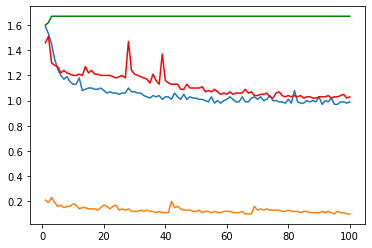

In [0]:
from matplotlib import pyplot as plt
x = np.linspace(1,100,100)
plt.plot(x,m1y[0:100])
plt.plot(x,m2y[0:100],color = 'r')
plt.plot(x,m3y[0:100],color = 'g')
plt.plot(x,m4y[0:100])
plt.savefig('/content/drive/My Drive/Data_Almond/100_epoch.jpg')

In [0]:
# loading the best model weights from each of these.
model_1.load_weights('/content/drive/My Drive/Data_Almond/best_model_1.h5')
model_2.load_weights('/content/drive/My Drive/Data_Almond/best_model_2.h5')
model_3.load_weights('/content/drive/My Drive/Data_Almond/best_model_3.h5')
model_4.load_weights('/content/drive/My Drive/Data_Almond/best_model_4.h5')

In [0]:
# testing the classification accuracy of the model_1, model_2 and model_3.
def class_acc(model,x,y):
  yhat = model.predict(x)
  count = int(0)
  for i in range(0,y.shape[0]):
    if(np.argmax(y[i]) == np.argmax(yhat[i])):
      count = count + 1
  return count/y.shape[0]

In [0]:
print(class_acc(model_1,data_test_x,data_test_y))
print(class_acc(model_2,g_test,data_test_y))
print(class_acc(model_3,data_test_x,data_test_y))

0.3231707317073171
0.20121951219512196
0.20121951219512196


In [0]:
# for the siamese network.
yhat = model_4.predict([vx,vx2])
y = vl
count = int(0)
print(yhat)

[[0.8673865 ]
 [0.6655366 ]
 [0.6849508 ]
 ...
 [0.8650585 ]
 [1.1142292 ]
 [0.26227394]]


In [0]:
# confusion matrix kinda.
def param(yhat,y,thres):
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  for i in range(0,yhat.shape[0]):
    if y[i] == 1:
      if np.exp(-yhat[i]) > thres:
        tp = tp + 1
      else:
        fn = fn + 1
    else:
      if np.exp(-yhat[i]) > thres:
        fp = fp + 1
      else:
        tn = tn + 1
  se = tp/(tp+fn)
  sp = tn/(fp+tn)
  pr = tp/(tp+fp)
  print('Sensitivity '+str(se),end = " ")
  print('Specificity '+str(sp),end = " ")
  print('Precision '+str(pr),end = " ")
  print('F1_Score '+str(2*(pr*se)/(pr+se)))
  return se, sp

In [0]:
y = vl

Sensitivity 1.0 Specificity 0.026526526526526525 Precision 0.2051491622394769 F1_Score 0.34045439131909117
Sensitivity 1.0 Specificity 0.026526526526526525 Precision 0.2051491622394769 F1_Score 0.34045439131909117
Sensitivity 1.0 Specificity 0.09559559559559559 Precision 0.21741013425725422 F1_Score 0.35716826752045533
Sensitivity 1.0 Specificity 0.09559559559559559 Precision 0.21741013425725422 F1_Score 0.35716826752045533
Sensitivity 1.0 Specificity 0.1981981981981982 Precision 0.23859315589353614 F1_Score 0.38526477359938605
Sensitivity 1.0 Specificity 0.1981981981981982 Precision 0.23859315589353614 F1_Score 0.38526477359938605
Sensitivity 0.99800796812749 Specificity 0.2857857857857858 Precision 0.2598547717842324 F1_Score 0.41234567901234576
Sensitivity 0.99800796812749 Specificity 0.2857857857857858 Precision 0.2598547717842324 F1_Score 0.41234567901234576
Sensitivity 0.9900398406374502 Specificity 0.36786786786786785 Precision 0.28238636363636366 F1_Score 0.43943412908930146
Se

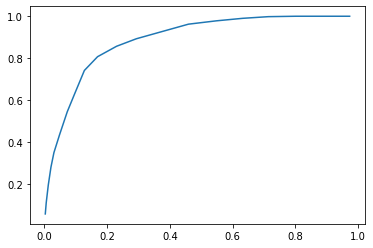

In [0]:
thres = np.linspace(0.1,0.9,20)
#thres.shape
tpr = []
fpr = []
for i in range(0,20):
  tpr.append(param(yhat,y,thres[i])[0])
  fpr.append(1-param(yhat,y,thres[i])[1])
tpr = np.array(tpr)
plt.plot(fpr,tpr)
plt.savefig('/content/drive/My Drive/graph.jpg')